# Workshop week 2

In this workshop we will compare all classifiers from the past 2 weeeks that we learned about so far with the diabetes dataset and try to find the best possible model parameters. 
<br><br>
1. Make a train test split of 75% train / 25 % test (optional: try KFord with 5 - folds)
<br><br>
2. Fit a dummy classifier.
<br><br>
3. Fit a Gaussian Naive Bayes classifier.
<br><br>
4. Fit a KNN classifier. Do a grid search to find optimal parameters 'n_neighbors' in range of 1 to 50. Once you find optimal K refit a model with those parameters on X_train, y_train.
<br><br>
5. Fit a Decision tree classifier. Find optimal parameter values for 'max_depth' in range of 1 to 10. Once you find optimal max_depth refit a model with those parameters on X_train, y_train.
<br><br>
6. Fit a support vector classifier. Try to find optimal parameter values for the following 3 parameters. For kernel try ['rbf', 'sigmoid'], for the soft margin parameter C try [0.1, 1, 10, 100] and for the gamma parameter try [1,0.1,0.01,0.001] (the gamma parameter defines how far the influence of a single training example reaches). Once you find optimal parameters refit a model with those parameters on X_train, y_train.
<br><br>
7. Fit Random Forest Classifier with default parameters.
<br><br>
8. Fit BaggingClassifier with base_estimator=DecisionTreeClassifier().
<br><br>
9. Fit AdaBoostClassifier with base_estimator=DecisionTreeClassifier().
<br><br>
10. Fit Voting Classifier with 'DecisionTreeClassifier(), SVC(degree=2, kernel='poly') and Gaussian Naive Bayes. (or try your own Vote Classifier)
<br><br>
11. Try KFold with some classifier. Discuss the results.
<br><br>
12. Optional: Try Voting(weighted), Stacking, Boosting algorithm.

<br><br>
13. **Summary:** Compare and discuss the results, compare the accuracy of all the best models on the 25% test set, analyze the classification report. 
<br>
*Note:* Use random_state = 0

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For performing train/test/split
from sklearn.model_selection import train_test_split

# import all the models
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC

# For computing accuracy score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn import metrics
from sklearn.metrics import roc_curve, confusion_matrix, classification_report

## Dataset info
<br>
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
<br><br>
Content<br>
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
<br><br>
Acknowledgements<br>
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

In [2]:
# read the dataset
df = pd.read_csv('diabetes.csv')

# drop the unwanted columns
df.drop(['Unnamed: 0', 'id'], axis='columns', inplace=True)
# set our target vector
y = df['class']

# set our feature columns
df.drop('class', axis='columns', inplace=True)
X = df

In [3]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    float64
 1   plas    768 non-null    float64
 2   pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   insu    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    float64
dtypes: float64(8)
memory usage: 48.1 KB


In [5]:
df.isna().sum()

preg    0
plas    0
pres    0
skin    0
insu    0
mass    0
pedi    0
age     0
dtype: int64

#### 1. Make a train test split of 75% train / 25 % test (optional: try KFord with 5 - folds)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
X_train.count()

preg    576
plas    576
pres    576
skin    576
insu    576
mass    576
pedi    576
age     576
dtype: int64

In [8]:
X_test.count()

preg    192
plas    192
pres    192
skin    192
insu    192
mass    192
pedi    192
age     192
dtype: int64

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [10]:
model = RandomForestClassifier(random_state=0)

In [11]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [12]:
kf

KFold(n_splits=5, random_state=0, shuffle=True)

In [13]:
score = cross_val_score(model, X, y, cv=kf)

In [14]:
score

array([0.82467532, 0.70779221, 0.75324675, 0.78431373, 0.77124183])

In [15]:
score.mean()

0.7682539682539682

#### 2. Fit a dummy classifier.

In [16]:
from sklearn.dummy import DummyClassifier

In [17]:
dummy_clf = DummyClassifier(strategy="most_frequent")

In [18]:
dummy_clf.fit(X, y)

DummyClassifier(strategy='most_frequent')

In [19]:
dummy_clf.score(X, y)

0.6510416666666666

In [20]:
y_pred_dummy = dummy_clf.predict(X_test)

In [30]:
y_pred_dummy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix')

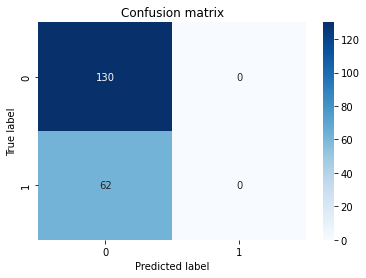

In [36]:
cm = confusion_matrix(y_test, y_pred_dummy)
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')

In [38]:
print("Dummy classificator classified the majority of the class, no matter if it is true or false. In this case, the majority is class 0 and therefore we have true positive of 0 and false positive of 0.")

Dummy classificator classified the majority of the class, no matter if it is true or false. In this case, the majority is class 0 and therefore we have true positive of 0 and false positive of 0.


#### 3. Fit a Gaussian Naive Bayes classifier

In [157]:
clf_gnb = GaussianNB().fit(X_train, y_train)

In [158]:
clf_gnb.score(X, y)

0.765625

In [33]:
y_pred_nb = clf_gnb.predict(X_test)

In [34]:
y_pred_nb

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix')

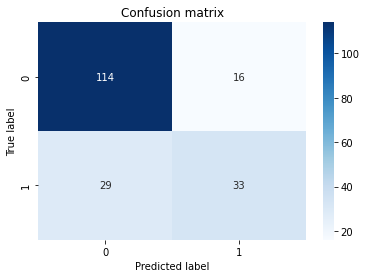

In [40]:
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')

In [41]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.67      0.53      0.59        62

    accuracy                           0.77       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.76      0.77      0.76       192



#### 4. Fit a KNN classifier. Do a grid search to find optimal parameters 'n_neighbors' in range of 1 to 50. Once you find optimal K refit a model with those parameters on X_train, y_train.

In [164]:
for neighbors in range(1,51):
    clf_knn = KNeighborsClassifier(n_neighbors=neighbors).fit(X_train, y_train)
    y_pred=clf_knn.predict(X_test)
    score_knn=accuracy_score(y_test,y_pred)
    score.append(score_knn)
    knn_dict={k+1:v for k,v in enumerate(score)}
    
    score.append(score_knn)
    knn_dict={k+1:v for k,v in enumerate(score)}

In [165]:
max(knn_dict, key=knn_dict.get)

10

In [166]:
score_knn=accuracy_score(y_train, knn_model.predict(X_train))

In [167]:
score_knn

0.7361111111111112

In [168]:
best_neigh = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
scoretrain = best_neigh.score(X_train, y_train)
scoretest = best_neigh.score(X_test, y_test)

In [169]:
 print("KNN classificator with n_neighbors of 10: testscore: {:2f}".format(score_knn))

KNN classificator with n_neighbors of 10: testscore: 0.736111


In [170]:
y_pred_knn = best_neigh.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix')

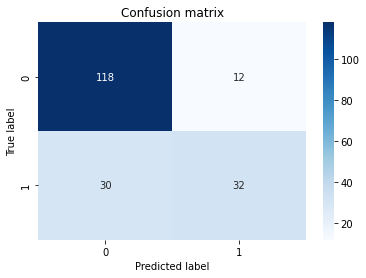

In [171]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')

#### 5. Fit a Decision tree classifier. Find optimal parameter values for 'max_depth' in range of 1 to 10. Once you find optimal max_depth refit a model with those parameters on X_train, y_train.

In [53]:
for max_depth in range(1,11):
    clf_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=0).fit(X_train, y_train)
    scoretrain_dt = clf_dt.score(X_train, y_train)
    scoretest_dt = clf_dt.score(X_test, y_test)
    print("DT classificator with max depth: {}, training score: {:2f}, testscore{:2f}".format(max_depth, scoretrain_dt, scoretest_dt))

DT classificator with max depth: 1, training score: 0.748264, testscore0.750000
DT classificator with max depth: 2, training score: 0.748264, testscore0.750000
DT classificator with max depth: 3, training score: 0.762153, testscore0.734375
DT classificator with max depth: 4, training score: 0.779514, testscore0.744792
DT classificator with max depth: 5, training score: 0.819444, testscore0.781250
DT classificator with max depth: 6, training score: 0.862847, testscore0.739583
DT classificator with max depth: 7, training score: 0.892361, testscore0.770833
DT classificator with max depth: 8, training score: 0.911458, testscore0.765625
DT classificator with max depth: 9, training score: 0.932292, testscore0.776042
DT classificator with max depth: 10, training score: 0.954861, testscore0.755208


In [54]:
dt_best = DecisionTreeClassifier(max_depth=5,random_state=0).fit(X_train, y_train)
scoretrain_dt5 = dt_best.score(X_train, y_train)
scoretest_dt5 = dt_best.score(X_test, y_test)

In [55]:
print("DT classificator with max depth of 5: training score: {:2f}, testscore: {:2f}".format(scoretrain_dt5, scoretest_dt5))

DT classificator with max depth of 5: training score: 0.819444, testscore: 0.781250


In [57]:
y_pred_dt = dt_best.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix')

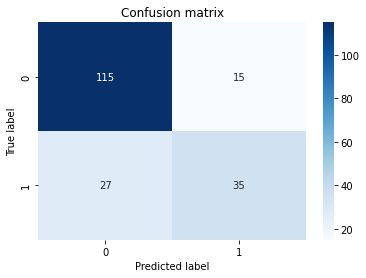

In [58]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')

In [59]:
print('I think that max_depth 5 gives the most accurate results, the test score after 5 goes down.')

I think that max_depth 5 gives the most accurate results, the test score after 5 goes down.


#### 6. Fit a support vector classifier. Try to find optimal parameter values for the following 3 parameters. For kernel try ['rbf', 'sigmoid'], for the soft margin parameter C try [0.1, 1, 10, 100] and for the gamma parameter try [1,0.1,0.01,0.001] (the gamma parameter defines how far the influence of a single training example reaches). Once you find optimal parameters refit a model with those parameters on X_train, y_train.

In [60]:
for this_kernel in ['rbf', 'sigmoid']:
    for this_C in [0.1, 1, 10, 100]:
        for this_gamma in [1,0.1,0.01,0.001, 'scale']:
            clf_svm = SVC(C = this_C, gamma = this_gamma, kernel=this_kernel).fit(X_train, y_train)
            scoretrain_svm = clf_svm.score(X_train, y_train)
            scoretest_svm = clf_svm.score(X_test, y_test)
            print("Non-linear SVM: {}, C param: {}, gamma param:{}, training score: {:2f} and testscore: {:2f}".format(this_kernel, this_C, this_gamma, scoretrain_svm, scoretest_svm))

Non-linear SVM: rbf, C param: 0.1, gamma param:1, training score: 0.642361 and testscore: 0.677083
Non-linear SVM: rbf, C param: 0.1, gamma param:0.1, training score: 0.642361 and testscore: 0.677083
Non-linear SVM: rbf, C param: 0.1, gamma param:0.01, training score: 0.642361 and testscore: 0.677083
Non-linear SVM: rbf, C param: 0.1, gamma param:0.001, training score: 0.668403 and testscore: 0.682292
Non-linear SVM: rbf, C param: 0.1, gamma param:scale, training score: 0.678819 and testscore: 0.708333
Non-linear SVM: rbf, C param: 1, gamma param:1, training score: 1.000000 and testscore: 0.677083
Non-linear SVM: rbf, C param: 1, gamma param:0.1, training score: 1.000000 and testscore: 0.677083
Non-linear SVM: rbf, C param: 1, gamma param:0.01, training score: 0.975694 and testscore: 0.687500
Non-linear SVM: rbf, C param: 1, gamma param:0.001, training score: 0.840278 and testscore: 0.755208
Non-linear SVM: rbf, C param: 1, gamma param:scale, training score: 0.758681 and testscore: 0.7

In [61]:
svm = SVC()
param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'sigmoid']}

In [62]:
grid = GridSearchCV(SVC(),param_grid_svm)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid']})

In [63]:
print('best parameters', grid.best_estimator_)

best parameters SVC(C=1, gamma=0.001)


In [64]:
clf_best = SVC(C=1, kernel ='rbf', gamma=0.001).fit(X_train, y_train)
scoretrain_svc = clf_best.score(X_train, y_train)
scoretest_svc = clf_best.score(X_test, y_test)

In [65]:
print("SVM classificator with kernel rbf, C=1 and gamma=0.001 has: training score: {:2f}, testscore: {:2f}".format(scoretrain_svc, scoretest_svc))

SVM classificator with kernel rbf, C=1 and gamma=0.001 has: training score: 0.840278, testscore: 0.755208


In [66]:
y_pred_svm = clf_best.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix')

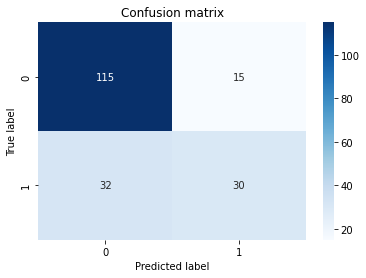

In [67]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')

#### 7. Fit Random Forest Classifier with default parameters.

In [68]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [69]:
y_pred_rf = clf_rf.predict(X_test)

In [70]:
y_pred_rf

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [71]:
print("Accuracy score RF:", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy score RF: 0.7708333333333334


Text(0.5, 1.0, 'Confusion matrix')

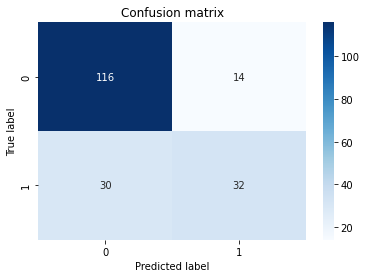

In [72]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')

In [73]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       130
           1       0.70      0.52      0.59        62

    accuracy                           0.77       192
   macro avg       0.75      0.70      0.72       192
weighted avg       0.76      0.77      0.76       192



#### 8. Fit BaggingClassifier with base_estimator=DecisionTreeClassifier().

In [93]:
clf_bg = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0))
clf_bg.fit(X_train, y_train)
#base_estimator=DecisionTreeClassifier() is a default base_estimator

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0))

In [94]:
y_pred_bg = clf_bg.predict(X_test)

In [95]:
print("Accuracy score Bagging:", metrics.accuracy_score(y_test, y_pred_bg))

Accuracy score Bagging: 0.7864583333333334


Text(0.5, 1.0, 'Confusion matrix')

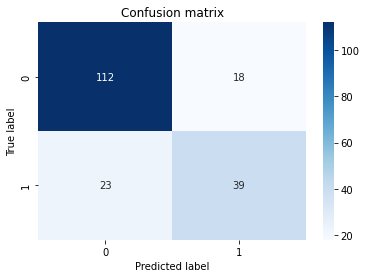

In [96]:
cm = confusion_matrix(y_test, y_pred_bg)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')

#### 9. Fit AdaBoostClassifier with base_estimator=DecisionTreeClassifier().

In [101]:
clf_ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0))
clf_ab.fit(X_train, y_train)
#base_estimator=DecisionTreeClassifier() is a default base_estimator

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0))

In [102]:
y_pred_ab = clf_ab.predict(X_test)

In [103]:
print("Accuracy score Ada Boost:", metrics.accuracy_score(y_test, y_pred_ab))

Accuracy score Ada Boost: 0.7135416666666666


#### 10. Fit Voting Classifier with 'DecisionTreeClassifier(), SVC(degree=2, kernel='poly') and Gaussian Naive Bayes. (or try your own Vote Classifier)

In [104]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_svc = SVC(degree=2, kernel='poly')
clf_gnb = GaussianNB()

In [105]:
voting_clf = VotingClassifier(estimators=[('dt', clf_dt), ('svm', clf_svc), ('GNB', clf_gnb)], voting='hard')

In [106]:
voting_clf

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=0)),
                             ('svm', SVC(degree=2, kernel='poly')),
                             ('GNB', GaussianNB())])

In [107]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=0)),
                             ('svm', SVC(degree=2, kernel='poly')),
                             ('GNB', GaussianNB())])

In [108]:
y_pred_voting = voting_clf.predict(X_test)

In [109]:
metrics.accuracy_score(y_test, y_pred_voting)

0.7708333333333334

Text(0.5, 1.0, 'Confusion matrix')

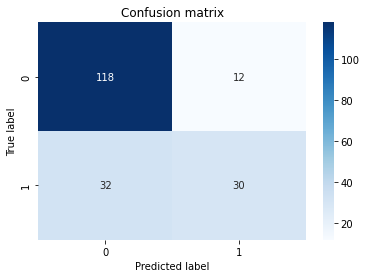

In [110]:
cm = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')

In [111]:
print(classification_report(y_test, y_pred_voting))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       130
           1       0.71      0.48      0.58        62

    accuracy                           0.77       192
   macro avg       0.75      0.70      0.71       192
weighted avg       0.76      0.77      0.76       192



#### 11. Try KFold with some classifier. Discuss the results.

In [117]:
model = RandomForestClassifier(random_state=0)

In [134]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)

In [135]:
kf

KFold(n_splits=10, random_state=0, shuffle=True)

In [136]:
score = cross_val_score(model, X, y, cv=kf)

In [137]:
score

array([0.77922078, 0.83116883, 0.72727273, 0.76623377, 0.74025974,
       0.74025974, 0.88311688, 0.7012987 , 0.69736842, 0.84210526])

In [138]:
score.mean()

0.7708304853041695

In [139]:
print('Using Random forest classificator for K-fold CV, the entire data split in 10 testing samples, gives acceptable accuracy, compared to the previous results. ')

Using Random forest classificator for K-fold CV, the entire data split in 10 testing samples, gives acceptable accuracy, compared to the previous results. 


#### 12. Optional: Try Voting(weighted), Stacking, Boosting algorithm.

In [140]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_svc = SVC(degree=2, kernel='poly')
clf_gnb = GaussianNB()

In [141]:
eclf = VotingClassifier(estimators=[('dt', clf_dt), ('svm', clf_svc), ('GNB', clf_gnb)], voting='hard', weights=[1, 2, 2])

In [142]:
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=0)),
                             ('svm', SVC(degree=2, kernel='poly')),
                             ('GNB', GaussianNB())],
                 weights=[1, 2, 2])

In [143]:
y_pred_w = eclf.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix')

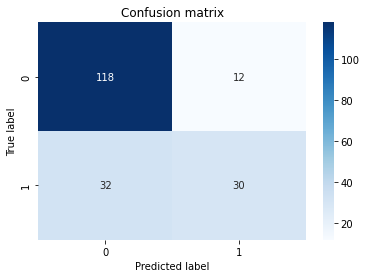

In [144]:
cm = confusion_matrix(y_test, y_pred_w)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')

In [145]:
print("Accuracy for Voting:", metrics.accuracy_score(y_test, y_pred_w))

Accuracy for Voting: 0.7708333333333334


#### Stacking

In [146]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

In [186]:
clf1 = DecisionTreeClassifier(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = GaussianNB()
sclf = StackingClassifier(estimators=[(clf1), (clf2), (clf3)], final_estimator=LogisticRegression())
sclf=sclf.fit(X_train, y_train)
y_pred_st=sclf.predict(X_test)
st_score=accuracy_score(y_test, y_pred)
st_score
#Note: I don't know why it doesn't work, tried all I could try :(

TypeError: 'DecisionTreeClassifier' object is not iterable

#### AdaBoostClassifier

In [152]:
clf = AdaBoostClassifier(n_estimators=100)

In [153]:
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [154]:
y_pred_ab = clf.predict(X_test)

In [155]:
print("Accuracy for Adaboost:",metrics.accuracy_score(y_test, y_pred_ab))

Accuracy for Adaboost: 0.7760416666666666


### 13. Summary: Compare and discuss the results, compare the accuracy of all the best models on the 25% test set, analyze the classification report.

In [172]:
print('Dummy score',dummy_clf.score(X, y))
print('Gaussian Naive Score', clf_gnb.score(X, y))
print("KNN classificator with n_neighbors of 10: testscore: {:2f}".format(score_knn))
print("DT classificator with max depth of 5: training score: {:2f}, testscore: {:2f}".format(scoretrain_dt5, scoretest_dt5))
print("SVM classificator with kernel rbf, C=1 and gamma=0.001 has: training score: {:2f}, testscore: {:2f}".format(scoretrain_svc, scoretest_svc))
print("Accuracy score RF:", metrics.accuracy_score(y_test, y_pred_rf))
print("Accuracy score Bagging:", metrics.accuracy_score(y_test, y_pred_bg))
print("Accuracy score Ada Boost:", metrics.accuracy_score(y_test, y_pred_ab))
print('Voting score', metrics.accuracy_score(y_test, y_pred_voting))

Dummy score 0.6510416666666666
Gaussian Naive Score 0.765625
KNN classificator with n_neighbors of 10: testscore: 0.736111
DT classificator with max depth of 5: training score: 0.819444, testscore: 0.781250
SVM classificator with kernel rbf, C=1 and gamma=0.001 has: training score: 0.840278, testscore: 0.755208
Accuracy score RF: 0.7708333333333334
Accuracy score Bagging: 0.7864583333333334
Accuracy score Ada Boost: 0.7760416666666666
Voting score 0.7708333333333334


In [136]:
print('Having into account that there are a lot of missing data for some of the features, especially insulin level(cannot be 0), pressure info (cannot be 9) etc., all the models gave modest accuracy scores, which might be result of this missing data.')

Having into account that there are a lot of missing data for some of the features, especially insulin level(cannot be 0), pressure info (cannot be 9) etc., all the models gave modest accuracy scores, which might be result of this missing data.


In [190]:
column_names=['Classifier', 'Accuracy']
classifiers=['Dummy', 'Gaussian Naive-Bayes', 'KNN', 'Decision Tree', 'SVC', 'Random Forest', 'Bagging', 'AdaBoost', 'Voting score']
scores=[dummy_clf.score(X, y), clf_gnb.score(X, y),score_knn, scoretest_dt5, scoretest_svc,  metrics.accuracy_score(y_test, y_pred_rf), metrics.accuracy_score(y_test, y_pred_bg),metrics.accuracy_score(y_test, y_pred_ab),metrics.accuracy_score(y_test, y_pred_voting)]
rating_df= pd.DataFrame(columns=column_names)
rating_df['Classifier']=classifiers
rating_df['Accuracy']=scores

In [191]:
rating_df

,Classifier,Accuracy
0,Dummy,0.651042
1,Gaussian Naive-Bayes,0.765625
2,KNN,0.736111
3,Decision Tree,0.781250
4,SVC,0.755208
5,Random Forest,0.770833
6,Bagging,0.786458
7,AdaBoost,0.776042
8,Voting score,0.770833
